# Introduction To Exponential Smoothing

Import packages and set up the notebook

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.forecasting.exp_smoothing import ExponentialSmoothing as ets
from sktime.forecasting.ets import AutoETS

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 50
import warnings
warnings.filterwarnings('ignore')

#### Load sample data (prepared earlier)

In [83]:
# Read in the data
df = pd.read_csv("../../data/intro_ets.csv")

In [84]:
# Examine the start of 
df.head()

,t1,t2,t3,t4
0,1.164927,0.00,0.315228,1.164927
1,1.886936,0.04,1.339403,1.176576
2,1.996980,0.08,1.250589,1.188342
3,1.315115,0.12,2.132702,1.200225
4,1.817358,0.16,2.792829,1.212227


# Simple Exponential Smoothing

Formula for simple exponential smoothing...

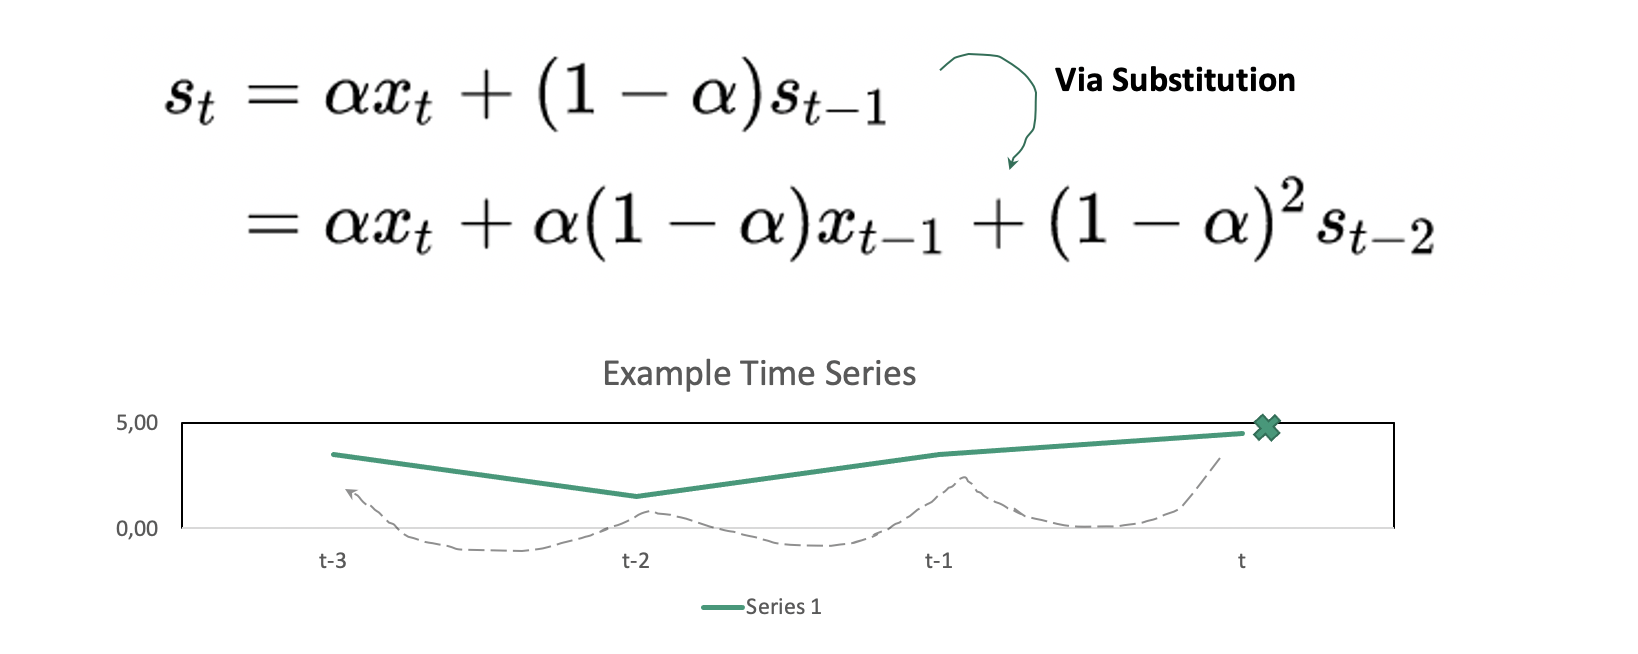

Lets now try out simple exponential smoothing on a time series

Text(0.5, 1.0, 'Time Series #1')

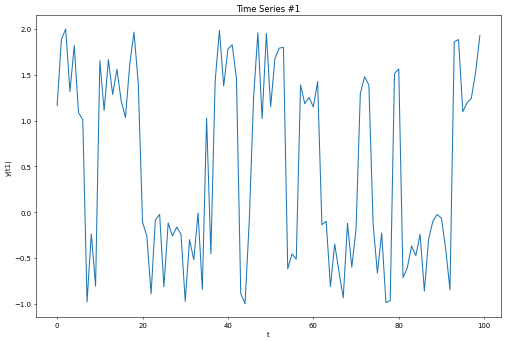

In [86]:
plt.plot(df['t1'])
plt.xlabel("t")
plt.ylabel("y(t1)")
plt.title('Time Series #1')

Train the model with arbitrary smoothing_level (alpha) parameter:

In [116]:
# Simple exponential smoothing
ets_model = ets(trend=None,
               damped=False,
               seasonal=None,
               smoothing_level = 0.2, # Single exponential smoothing (Alpha )
               smoothing_slope = None, # Double Exponential smoothing (Beta)
               smoothing_seasonal = None ) # Triple Exponential smoothing (Gamma)

In [117]:
# Extract the fits
def extract_fit(y, model_object):
    y_fit = [np.nan, np.nan]
    for i in range(3,len(y)):  
        model_object.fit(y.iloc[:i])
        yh = model_object.predict(fh=0)
        y_fit.append(yh.to_numpy()[0])
    
    return np.array(y_fit)

The plot below shows the original time series and the backfit exponential smoothing values. Adjusting the alpha parameter controls the smoothness. Values of alpha near 1 put larger weights on more recent values. Values of alpha near 0 put larger weights on older values and hence we get a smoother fit.

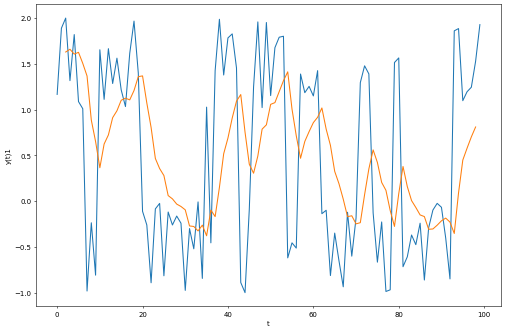

In [118]:
y_fit = extract_fit(df['t1'], ets_model)
ets_model.fit(df['t1'])
y_h = ets_model.predict(fh=np.arange(0,20))

plt.plot(df['t1'])
plt.plot(y_fit)
plt.xlabel("t")
plt.ylabel("y(t)1")
plt.show()

#### Now lets look at the forecast:

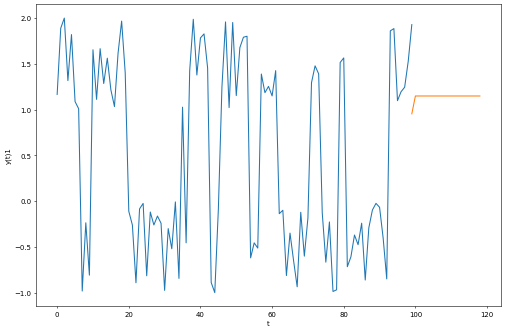

In [119]:
# Forecast
plt.plot(df['t1'])
plt.plot(y_h)
plt.xlabel("t")
plt.ylabel("y(t)1")
plt.show()

 ### What happens when we try it on a a series with a trend?

Text(0.5, 1.0, 'Time Series #2')

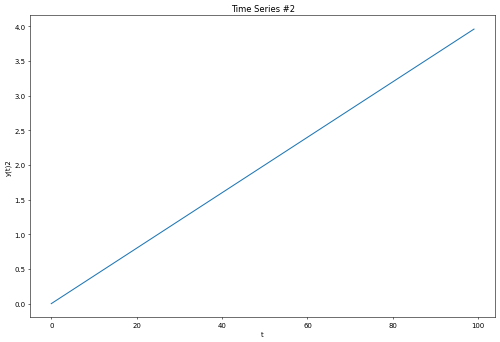

In [120]:
plt.plot(df['t2'])
plt.xlabel("t")
plt.ylabel("y(t)2")
plt.title('Time Series #2')

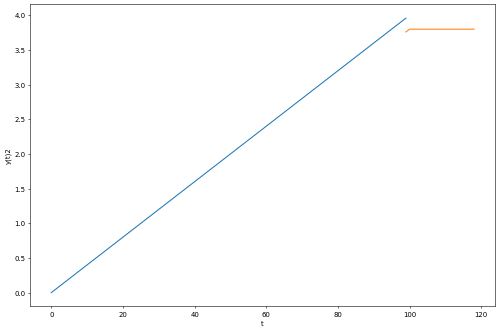

In [121]:
y_fit = extract_fit(df['t2'], ets_model)
ets_model.fit(df['t2'])
y_h = ets_model.predict(fh=np.arange(0,20))

plt.plot(df['t2'])
plt.plot(y_h)
plt.xlabel("t")
plt.ylabel("y(t)2")
plt.show()

# Double Exponential Smoothing

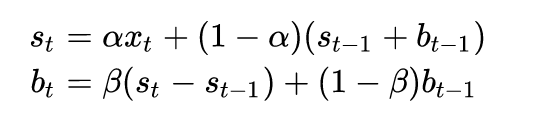

In [122]:
# Simple exponential smoothing
ets_model = ets(trend="additive",
               damped=False,
               seasonal=None,
               smoothing_level = 0.5, # Single exponential smoothing (Alpha )
               smoothing_slope = 0.5, # Double Exponential smoothing (Beta)
               smoothing_seasonal = None ) # Triple Exponential smoothing (Gamma)

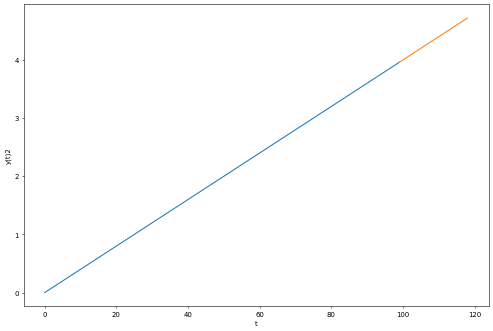

In [123]:
y_fit = extract_fit(df['t2'], ets_model)
ets_model.fit(df['t2'])
y_h = ets_model.predict(fh=np.arange(0,20))

plt.plot(df['t2'])
plt.plot(y_h)
plt.xlabel("t")
plt.ylabel("y(t)2")
plt.show()

### Ok, that works on simple series, but what if we want to exploit a known seasonal pattern?

Text(0.5, 1.0, 'Time Series #3')

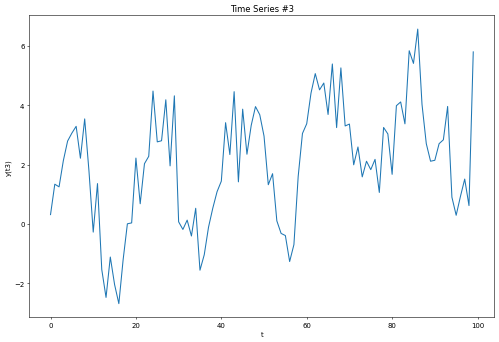

In [124]:
plt.plot(df['t3'])
plt.xlabel("t")
plt.ylabel("y(t3)")
plt.title('Time Series #3')

# Triple Exponential Smoothing

#### Add in a another formula to account for periodic cycles!

Triple Exponential Smoothing (Additive)
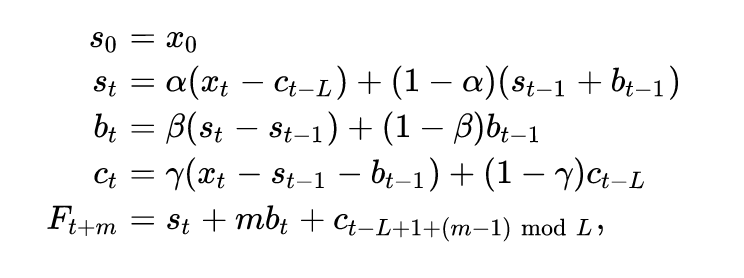

In [79]:
ets_model = ets(trend="additive",
               damped=False,
               seasonal="additive",
              sp = 20,
               smoothing_level = 0.4, # Single exponential smoothing (Alpha )
               smoothing_slope = 0.3, # Double Exponential smoothing (Beta)
               smoothing_seasonal = 0.2 ) # Triple Exponential smoothing (Gamma)

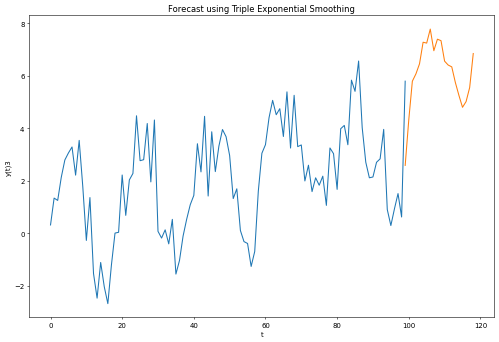

In [58]:
ets_model.fit(df['t3'])
y_h = ets_model.predict(fh=np.arange(0,20))

plt.plot(df['t3'])
plt.plot(y_h)
plt.xlabel("t")
plt.ylabel("y(t)3")
plt.title("Forecast using Triple Exponential Smoothing")
plt.show()

# Exponential Growth

Text(0.5, 1.0, 'Time Series #4')

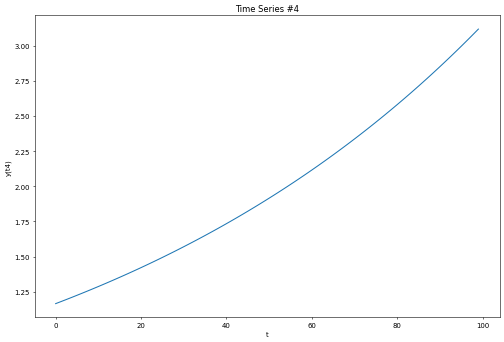

In [60]:
plt.plot(df['t4'])
plt.xlabel("t")
plt.ylabel("y(t4)")
plt.title('Time Series #4')

In [61]:
# Simple exponential smoothing
ets_model = ets(trend="multiplicative",
               damped=False,
               seasonal=None,
               smoothing_level = 0.6, # Single exponential smoothing (Alpha )
               smoothing_slope = 0.7, # Double Exponential smoothing (Beta)
               smoothing_seasonal = None ) # Triple Exponential smoothing (Gamma)


                

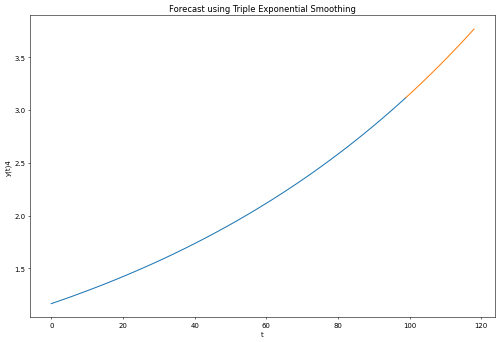

In [62]:
ets_model.fit(df['t4'])
y_h = ets_model.predict(fh=np.arange(0,20))

plt.plot(df['t4'])
plt.plot(y_h)
plt.xlabel("t")
plt.ylabel("y(t)4")
plt.title("Forecast using Triple Exponential Smoothing")
plt.show()

# Choosing alpha, beta, gamma with AutoETS

https://www.sktime.org/en/v0.4.3/modules/auto_generated/sktime.forecasting.ets.AutoETS.html

The SKTime package has compiled an AutoETS feature that will find the best parameters of alpha, beta and gamma via backfitting. Once you have chosen the appropriate model above, then this a great option to get a fast baseline.

In [74]:
ets_model = AutoETS(trend="additive",
               damped=False,
               seasonal="additive",
               sp = 20 ) 

In [75]:
ets_model.fit(df['t3'])


AutoETS(seasonal='additive', sp=20, trend='additive')

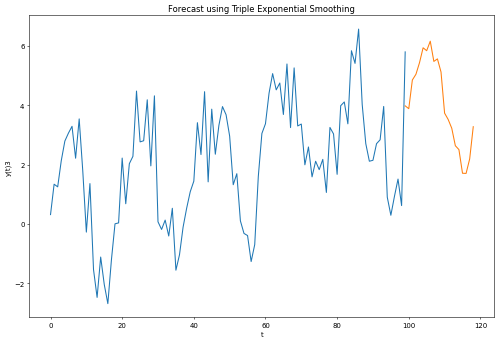

In [78]:
y_h = ets_model.predict(fh=np.arange(0,20))

plt.plot(df['t3'])
plt.plot(y_h)
plt.xlabel("t")
plt.ylabel("y(t)3")
plt.title("Forecast using Triple Exponential Smoothing")
plt.show()